### This notebook demonstrates how to generate a simulated user dataset for the Mood.fm project.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(10)

In [9]:
file_path = '../../datasets/278k_labelled_uri.csv'
moodify_data = pd.read_csv(file_path)
moodify_data.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


## User Groups Overview

We define seven user groups based on different preferences for emotions and musical attributes. Each group has distinct characteristics and reflects a different type of listener. Below is a description of each group, including their composition, attribute distribution, and a brief background.

1. **Group A (Sad/Acoustic)**
   - **Background**: This group consists of listeners who prefer mellow and introspective music. They often seek acoustic sounds and slower tempos.
   - **Label Weights**: Sad (0.6), Happy (0.1), Energetic (0.1), Calm (0.2)
   - **Attribute Distribution**:
     - Higher emphasis on Acousticness (0.8) and Instrumentalness (0.6)
     - Lower preference for Danceability (0.2) and Loudness (0.3)
     - Moderate values for Speechiness (0.4) and Tempo (0.4)

2. **Group B (Happy/Danceable)**
   - **Background**: Members of this group enjoy lively and upbeat music that gets them moving. They look for songs with high danceability and cheerful vibes.
   - **Label Weights**: Sad (0.1), Happy (0.7), Energetic (0.4), Calm (0.1)
   - **Attribute Distribution**:
     - High Danceability (0.7) and Valence (0.7) for a feel-good effect
     - Balanced Energy (0.5) and Tempo (0.5) for rhythm
     - Lower Acousticness (0.2), as they prefer electronic sounds

3. **Group C (Energetic)**
   - **Background**: This group is all about high-energy music that pumps them up, featuring strong beats and lively melodies.
   - **Label Weights**: Sad (0.1), Happy (0.4), Energetic (0.8), Calm (0.1)
   - **Attribute Distribution**:
     - High Energy (0.8) and Loudness (0.8)
     - Danceability (0.6) and Tempo (0.6) help maintain a fast pace
     - Lower Acousticness (0.3) to favor electric sounds

4. **Group D (Calm/Instrumental)**
   - **Background**: Listeners in this group prefer calm, soothing music, often with a focus on instrumental tracks for relaxation or concentration.
   - **Label Weights**: Sad (0.2), Happy (0.1), Energetic (0.1), Calm (0.6)
   - **Attribute Distribution**:
     - High Acousticness (0.7) and Instrumentalness (0.8)
     - Lower Danceability (0.3) and Loudness (0.2)
     - Moderate Valence (0.4) for a gentle mood

5. **Group E (Mixed Mood)**
   - **Background**: This group has a diverse range of musical tastes, often switching between different moods and genres.
   - **Label Weights**: Sad (0.3), Happy (0.3), Energetic (0.2), Calm (0.2)
   - **Attribute Distribution**:
     - Balanced weights across all attributes (0.5 each), reflecting varied preferences
     - Suitable for listeners who enjoy a mix of styles and emotions

6. **Group F (Energetic/High Tempo)**
   - **Background**: Composed of individuals who seek fast-paced, high-energy music with a focus on lively rhythms and beats.
   - **Label Weights**: Sad (0.1), Happy (0.3), Energetic (0.7), Calm (0.1)
   - **Attribute Distribution**:
     - High Tempo (0.8), Energy (0.9), and Loudness (0.7)
     - Lower Acousticness (0.2) and Instrumentalness (0.2)
     - Danceability (0.6) to keep the music engaging

7. **Group G (Calm/Relaxing)**
   - **Background**: Ideal for listeners who enjoy relaxing and meditative music, suitable for unwinding or background ambiance.
   - **Label Weights**: Sad (0.2), Happy (0.2), Energetic (0.1), Calm (0.7)
   - **Attribute Distribution**:
     - High Acousticness (0.8) and Instrumentalness (0.7)
     - Lower Danceability (0.2) and Loudness (0.2)
     - Lower Tempo (0.3) to maintain a slower pace


In [5]:
user_groups = {
    1: {'label_weights': [0.6, 0.1, 0.1, 0.2], 'attr_weights': {'danceability': 0.2, 'energy': 0.3, 'loudness': 0.3, 'speechiness': 0.4, 'acousticness': 0.8, 'instrumentalness': 0.6, 'liveness': 0.2, 'valence': 0.2, 'tempo': 0.4}},
    2: {'label_weights': [0.1, 0.7, 0.4, 0.1], 'attr_weights': {'danceability': 0.7, 'energy': 0.5, 'loudness': 0.6, 'speechiness': 0.3, 'acousticness': 0.2, 'instrumentalness': 0.3, 'liveness': 0.4, 'valence': 0.7, 'tempo': 0.5}},
    3: {'label_weights': [0.1, 0.4, 0.8, 0.1], 'attr_weights': {'danceability': 0.6, 'energy': 0.8, 'loudness': 0.8, 'speechiness': 0.4, 'acousticness': 0.3, 'instrumentalness': 0.2, 'liveness': 0.7, 'valence': 0.5, 'tempo': 0.6}},
    4: {'label_weights': [0.2, 0.1, 0.1, 0.6], 'attr_weights': {'danceability': 0.3, 'energy': 0.2, 'loudness': 0.2, 'speechiness': 0.3, 'acousticness': 0.7, 'instrumentalness': 0.8, 'liveness': 0.3, 'valence': 0.4, 'tempo': 0.3}},
    5: {'label_weights': [0.3, 0.3, 0.2, 0.2], 'attr_weights': {'danceability': 0.5, 'energy': 0.5, 'loudness': 0.5, 'speechiness': 0.5, 'acousticness': 0.5, 'instrumentalness': 0.5, 'liveness': 0.5, 'valence': 0.5, 'tempo': 0.5}},
    6: {'label_weights': [0.1, 0.3, 0.7, 0.1], 'attr_weights': {'danceability': 0.6, 'energy': 0.9, 'loudness': 0.7, 'speechiness': 0.3, 'acousticness': 0.2, 'instrumentalness': 0.2, 'liveness': 0.6, 'valence': 0.6, 'tempo': 0.8}},
    7: {'label_weights': [0.2, 0.2, 0.1, 0.7], 'attr_weights': {'danceability': 0.2, 'energy': 0.3, 'loudness': 0.2, 'speechiness': 0.2, 'acousticness': 0.8, 'instrumentalness': 0.7, 'liveness': 0.3, 'valence': 0.3, 'tempo': 0.3}},
}

In [6]:
# We generate a dataset of 100 users, assigning each to one of the user groups. 
# Weighted sampling is used to create a personalized song list for each user. 
# Each user has about 1000 songs.

num_users = 100
num_songs_per_user = 1000

user_datasets = []
for user_id in range(1, num_users + 1):
    group_no = np.random.choice(list(user_groups.keys()))
    group = user_groups[group_no]

    # Normalize the label weights
    label_prob = np.array(group['label_weights'])
    label_prob /= label_prob.sum()

    # Pre-select data based on the label probabilities
    selected_labels = np.random.choice([0, 1, 2, 3], size=num_songs_per_user, p=label_prob)
    label_filtered_data = moodify_data[moodify_data['labels'].isin(selected_labels)]

    # Perform weighted sampling using attribute weights
    attr_weights = group['attr_weights']
    attribute_scores = label_filtered_data[list(attr_weights.keys())].mul(list(attr_weights.values()), axis=1).sum(axis=1)
    attribute_scores = attribute_scores.clip(lower=0)
    attribute_scores_sum = attribute_scores.sum()
    if attribute_scores_sum > 0:
        attribute_scores /= attribute_scores_sum

    # Sample songs for the user
    sampled_songs = label_filtered_data.sample(n=num_songs_per_user, weights=attribute_scores, replace=True, random_state=user_id)
    sampled_songs['user_id'] = user_id
    sampled_songs['group_no'] = group_no
    user_datasets.append(sampled_songs)

final_dataset = pd.concat(user_datasets, ignore_index=True)
final_dataset.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri,user_id,group_no
0,246022.0,0.709,0.965,-2.686,0.2110,0.0320,0.025800,0.118,0.699,120.065,8.576469e-07,1,spotify:track:2QcbhQWfVD5QcTJzAtpYsg,1,2
1,217187.0,0.552,0.463,-9.976,0.0292,0.4550,0.000166,0.103,0.498,79.312,1.344464e-07,0,spotify:track:3zsrxImXgoplvMZla6sXk4,1,2
2,266668.0,0.570,0.368,-9.128,0.0329,0.0514,0.000000,0.108,0.136,139.937,1.233744e-07,0,spotify:track:3tzlgaWjqZJX0fq2hiQW62,1,2
3,170418.0,0.629,0.832,-5.633,0.0442,0.0547,0.203000,0.221,0.120,123.975,2.593623e-07,2,spotify:track:062ew4tNbEHK33H8QN3P6H,1,2
4,312413.0,0.510,0.887,-5.569,0.0799,0.0194,0.000000,0.225,0.255,134.029,2.557512e-07,2,spotify:track:7lhULmqN96IMncW8iFxYMn,1,2


In [8]:
output_path = '../../datasets/simulated_user_dataset.csv'
final_dataset.to_csv(output_path, index=False)
print(f'Dataset saved to {output_path}')

Dataset saved to ../../datasets/simulated_user_dataset.csv


#### Exploratory Data Analysis (EDA)
We will perform some exploratory data analysis on the simulated dataset to better understand the distribution of musical attributes and user preferences across different groups.


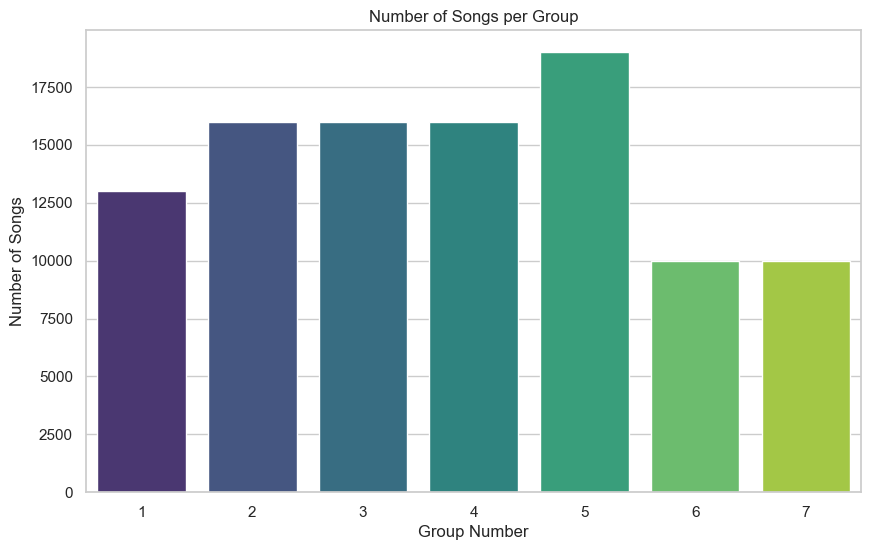

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='group_no', data=final_dataset, palette="viridis")
plt.title('Number of Songs per Group')
plt.xlabel('Group Number')
plt.ylabel('Number of Songs')
plt.show()

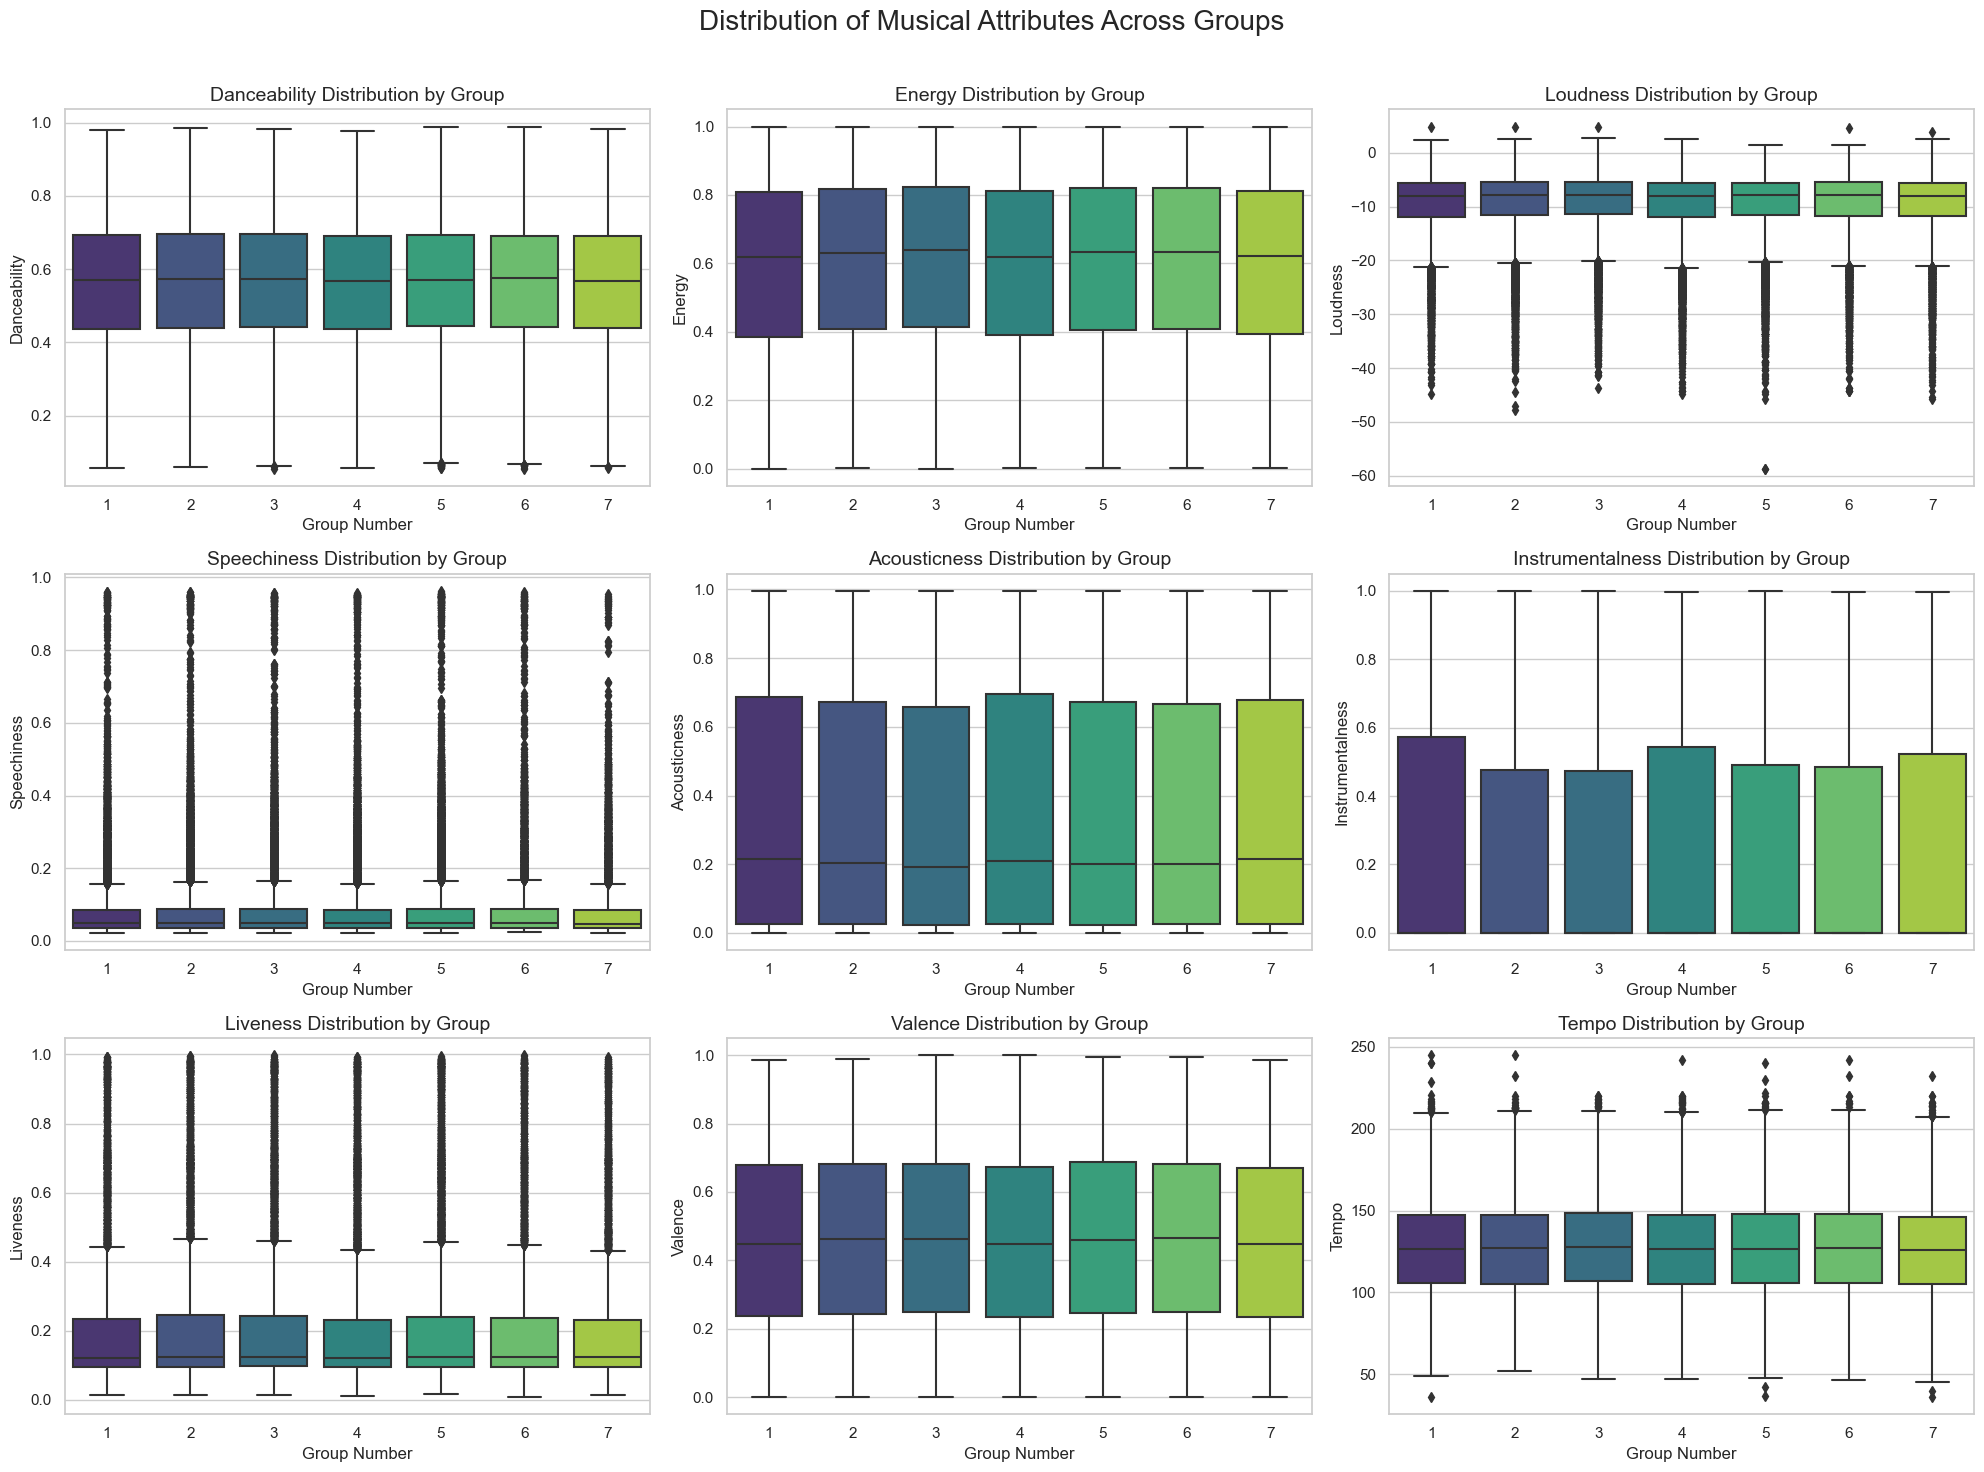

In [16]:
attributes = ['danceability', 'energy', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Distribution of Musical Attributes Across Groups', fontsize=20)

axes = axes.flatten()

for i, attr in enumerate(attributes):
    sns.boxplot(x='group_no', y=attr, data=final_dataset, palette="viridis", ax=axes[i])
    axes[i].set_title(f'{attr.capitalize()} Distribution by Group', fontsize=14)
    axes[i].set_xlabel('Group Number')
    axes[i].set_ylabel(attr.capitalize())

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


1. **Danceability**:
   - The median values for danceability are fairly consistent across all groups, with slight variations around 0.6-0.7.
   - Group 7 (Calm/Relaxing) has a slightly lower median, indicating less preference for danceable music, which aligns with its calmer music profile.

2. **Energy**:
   - Groups 6 (Energetic/High Tempo) and 3 (Energetic) show higher median energy levels, which fits their focus on lively and high-energy music.
   - Groups 4 (Calm/Instrumental) and 7 (Calm/Relaxing) have a noticeably lower median energy, reflecting its preference for softer, less intense music.

3. **Loudness**:
   - Group 5 (Mixed Mood) shows a wider range in loudness, with some lower values.
   - Groups 3 and 6, which are associated with energetic music, have slightly higher median loudness levels.

4. **Speechiness**:
   - All groups display low median values for speechiness, indicating a general preference for music with less spoken-word content.
   - There is no significant difference in the median speechiness values across the groups, suggesting this attribute is not a key distinguishing factor.

5. **Acousticness**:
   - Group 1 (Sad/Acoustic), Group 4 (Calm/Instrumental) and Group 7 (Calm/Relaxing) have higher median acousticness, consistent with their preference for acoustic and softer music styles.
   - Group 3 (Energetic) and Group 6 (Energetic/High Tempo) show lower acousticness values, aligning with their energetic music preferences.

6. **Instrumentalness**:
   - Group 1 (Sad/Acoustic) shows higher median instrumentalness, indicating a preference for instrumental tracks.
   - Groups 4 (Calm/Instrumental) and 7 (Calm/Relaxing) also has higher instrumentalness, fitting its calm and relaxing music style.
   - Groups 3 (Energetic) and 2 (Happy/Danceable) display lower instrumentalness, suggesting a preference for tracks with more vocals.

7. **Liveness**:
   - The liveness attribute is fairly consistent across all groups, with no significant variations in median values.
   - There is a slightly higher range for some groups like Group 6 (Energetic/High Tempo), which may indicate a slight preference for live music.

8. **Valence**:
   - Group 2 (Happy/Danceable) shows a higher median valence, which aligns with its focus on positive, upbeat music.
   - Group 1 (Sad/Acoustic) has a lower median valence, consistent with its association with more somber music.

9. **Tempo**:
   - Groups 6 (Energetic/High Tempo) and 3 (Energetic) show higher median tempo values, fitting their preference for fast-paced music.
   - Groups 4 (Calm/Instrumental) and 7 (Calm/Relaxing) has a lower median tempo, aligning with its preference for slower, more relaxing music.

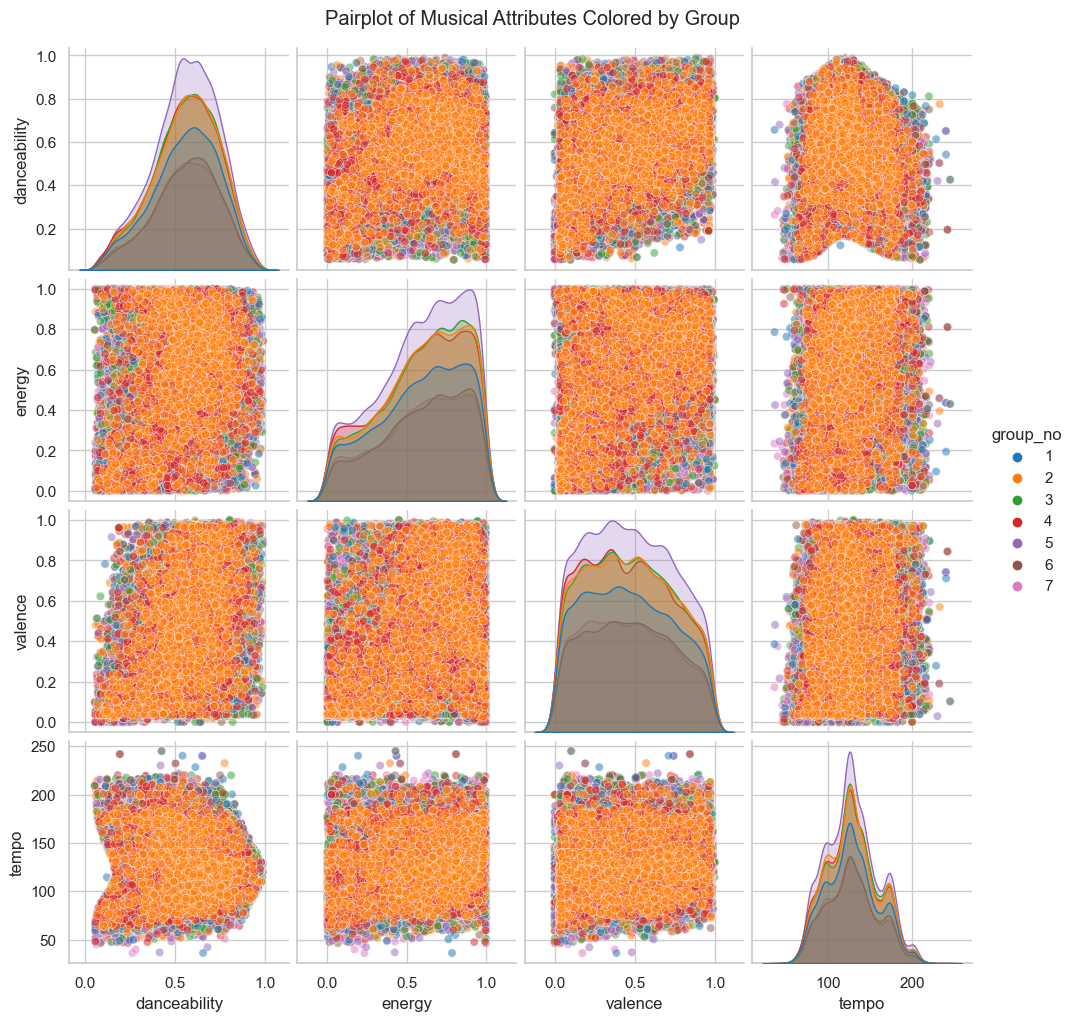

In [17]:
attributes_to_plot = ['danceability', 'energy', 'valence', 'tempo']
sns.pairplot(final_dataset[attributes_to_plot + ['group_no']], hue='group_no', palette="tab10", diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Musical Attributes Colored by Group', y=1.02)
plt.show()